In [1]:
import numpy as np 
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

# t=experiation time, p= ATM strike_price 4133.52
# p_c=call price, p_p=put price
# r=Risk-free interest rate to expiration


In [2]:
rf=0.016
time=30
T=time/365
strike_price=4133.52
def calculate_F(t,p,r,min_d):
    T=t/365
    F=p+math.exp(r*T)*min_d
    return F

In [2]:
data_type={'Strike':np.float64,"Midpoint":np.float64}
call=pd.read_csv("D://stock_data/call_option.csv",dtype=data_type)
put=pd.read_csv("D://stock_data/put_option.csv",dtype=data_type)
option_d=abs(call["Midpoint"]-put["Midpoint"])
p_call=call[call["Strike"]<=strike_price]["Midpoint"].tail(1).values[0]
p_put=put[put["Strike"]<=strike_price]["Midpoint"].tail(1).values[0]
print(p_call,"/n",p_put)

forward_p=calculate_F(time,strike_price,p_call,p_put,rf)
forward_p
call

74.15 /n 62.45


,Strike,Moneyness,Bid,Midpoint,Ask,Last,Change,%Chg,Volume,Open Int,OI Chg,Volume Open Interest Ratio,IV,Type,Time,Avg IV,Unnamed: 16
0,1200.0,70.97%,2927.1,2929.80,"2,932.50",0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%
1,1400.0,66.13%,2727.9,2730.60,"2,733.30",0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%
2,1600.0,61.29%,2528.8,2531.45,"2,534.10",0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%
3,1800.0,56.45%,2329.6,2332.25,"2,334.90",0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%
4,2000.0,51.62%,2130.4,2133.05,"2,135.70",0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,4600.0,-11.29%,0.0,0.15,0.3,0.15,-0.02,-11.76%,1,7,7,13.15%,Call,09:56 ET,14.18%,width: 1%,width: 11.11111111111111%
68,4800.0,-16.12%,0.0,0.08,0.15,0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%
69,5000.0,-20.96%,0.0,0.08,0.15,0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%
70,5200.0,-25.80%,0.0,0.05,0.1,0.00,0.00,unch,0,0,unch,0.00%,Call,NaN,14.18%,width: 1%,width: 1%


In [ ]:
K0=call[call["Strike"]<=forward_p]["Strike"].tail(1).values
kic=call[call["Strike"]>=forward_p][["Strike","Midpoint"]]
kip=put[put["Strike"]<forward_p][["Strike","Midpoint"]]
c=call[["Strike","Midpoint"]]
p=put[["Strike","Midpoint"]]
ki=pd.concat([kip,kic],axis=0)
deltaki=ki["Strike"].to_numpy()
lenth=len(deltaki)
delki=np.zeros(lenth)
for i in range(1,lenth-1):
    delki[i]=(deltaki[i+1]-deltaki[i-1])/2
delki[0]=deltaki[1]-deltaki[0]
delki[lenth-1]=deltaki[lenth-1]-deltaki[lenth-2]

# ki
ki2=deltaki*deltaki
qki=ki["Midpoint"]
qki=qki.to_numpy()
# delki

In [ ]:

def sum_ki(delki,ki2,r,T,qki):
    temp=0
    for i in range(len(delki)):
        temp+=delki[i]/ki2[i]*np.exp(r*T)*qki[i]
    
    return temp

In [ ]:
sumi=sum_ki(delki,ki2,rf,T,qki)
theta=2/T*sumi-(1/T)*(forward_p/K0-1)**2
# math.sqrt(theta[0])
# theta
answer=math.sqrt(theta[0])*100
print(" Volatility Index=",answer)

 Volatility Index= 16.71856528242804


## Question 2

In [9]:
# init para
n = norm.pdf
N = norm.cdf
K0 = 40
r0 = 0.04
sigma0 = 0.3
now_p = np.zeros(30)
T = [0.1,0.2,0.3,0.4,0.5]

def bs_gamma(S, K, T, r, sigma):
  d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/(sigma * np.sqrt(T))
  return (1/S/sigma/np.sqrt(T)*n(d1))

def bs_vega(S, K, T, r, sigma):
  d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/(sigma * np.sqrt(T))
  return (S * np.sqrt(T)*n(d1))



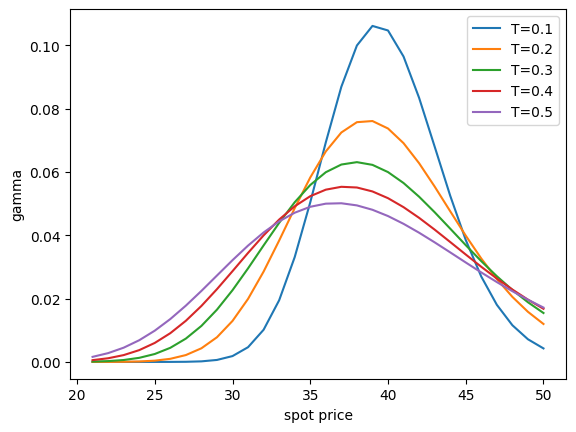

In [10]:
gamma1 = np.zeros(30)
gamma2 = np.zeros(30)
gamma3 = np.zeros(30)
gamma4 = np.zeros(30)
gamma5 = np.zeros(30)

for i in range(30):
  now_p[i] = 21 + i

for i in range(30):
  gamma1[i] = bs_gamma(now_p[i], K0, T[0], r0, sigma0)

for i in range(30):
  gamma2[i] = bs_gamma(now_p[i], K0, T[1], r0, sigma0)

for i in range(30):
  gamma3[i] = bs_gamma(now_p[i], K0, T[2], r0, sigma0)

for i in range(30):
  gamma4[i] = bs_gamma(now_p[i], K0, T[3], r0, sigma0)

for i in range(30):
  gamma5[i] = bs_gamma(now_p[i], K0, T[4], r0, sigma0)

plt.plot(now_p,gamma1,label = 'T=0.1')
plt.plot(now_p,gamma2,label = 'T=0.2')
plt.plot(now_p,gamma3,label = 'T=0.3')
plt.plot(now_p,gamma4,label = 'T=0.4')
plt.plot(now_p,gamma5,label = 'T=0.5')
plt.legend()
plt.xlabel('spot price')
plt.ylabel('gamma')
plt.show()

Text(0, 0.5, 'vega')

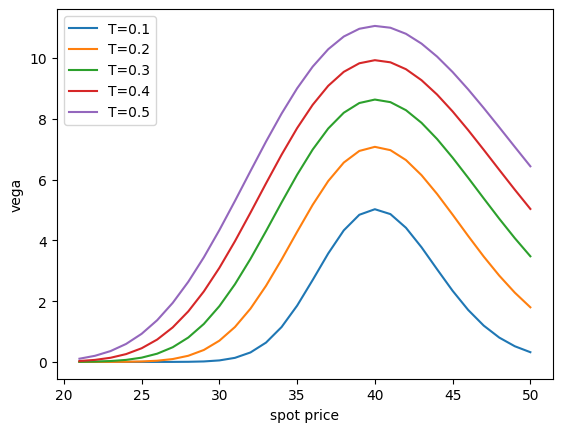

In [11]:
vega1 = np.zeros(30)
vega2 = np.zeros(30)
vega3 = np.zeros(30)
vega4 = np.zeros(30)
vega5 = np.zeros(30)

for i in range(30):
  now_p[i] = 21 + i

for i in range(30):
  vega1[i] = bs_vega(now_p[i], K0, T[0], r0, sigma0)

for i in range(30):
  vega2[i] = bs_vega(now_p[i], K0, T[1], r0, sigma0)

for i in range(30):
  vega3[i] = bs_vega(now_p[i], K0, T[2], r0, sigma0)

for i in range(30):
  vega4[i] = bs_vega(now_p[i], K0, T[3], r0, sigma0)

for i in range(30):
  vega5[i] = bs_vega(now_p[i], K0, T[4], r0, sigma0)

plt.plot(now_p,vega1,label = 'T=0.1')
plt.plot(now_p,vega2,label = 'T=0.2')
plt.plot(now_p,vega3,label = 'T=0.3')
plt.plot(now_p,vega4,label = 'T=0.4')
plt.plot(now_p,vega5,label = 'T=0.5')
plt.legend()
plt.xlabel('spot price')
plt.ylabel('vega')
plt.show()